# **#前処理**

In [1]:
import pandas as pd

# 学習用データとテストデータを読み込みます
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')

# 学習用データの最初の数行を表示します
print("学習用データ:")
print(train_data.head())

# 学習用データの概要統計量を表示します
print("\n学習用データの概要:")
print(train_data.describe())

# 学習用データに欠損値があるかを確認します
print("\n学習用データの欠損値:")
print(train_data.isnull().sum())

# テストデータの最初の数行を表示します
print("\nテストデータ:")
print(test_data.head())

# テストデータの欠損値を確認します
print("\nテストデータの欠損値:")
print(test_data.isnull().sum())


学習用データ:
   Unnamed: 0   mpg  cylinders  displacement horsepower  weight  acceleration  \
0           0  39.4          4          85.0         70    2070          18.6   
1           3  18.0          6         171.0         97    2984          14.5   
2           9  32.7          6         168.0        132    2910          11.4   
3          11  38.1          4          89.0         60    1968          18.8   
4          13  28.0          4          98.0         80    2164          15.0   

   model year  origin               car name  
0          78       3         datsun b210 gx  
1          75       1             ford pinto  
2          80       3          datsun 280-zx  
3          80       3  toyota corolla tercel  
4          72       1        dodge colt (sw)  

学習用データの概要:
       Unnamed: 0         mpg   cylinders  displacement       weight  \
count  199.000000  199.000000  199.000000    199.000000   199.000000   
mean   200.170854   22.997990    5.527638    200.889447  3063.32663

In [13]:
# 学習用データのカラム名を確認します
print("学習用データのカラム:")
print(train_data.columns)

# テストデータのカラム名を確認します
print("\nテストデータのカラム:")
print(test_data.columns)


学習用データのカラム:
Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

テストデータのカラム:
Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [2]:
import pandas as pd

# 学習用データとテストデータを読み込みます
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')

print("学習用データのカラム")
print(train_data.columns)

print("テストデータ用のカラム")
print(test_data.columns)


学習用データのカラム
Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
テストデータ用のカラム
Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np

# データの読み込み
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/test.tsv', sep='\t')

# horsepower列の欠損値処理: '?'をNaNに置き換え、その後数値型に変換します
train_data['horsepower'].replace('?', np.nan, inplace=True)
train_data['horsepower'] = train_data['horsepower'].astype(float)
test_data['horsepower'].replace('?', np.nan, inplace=True)
test_data['horsepower'] = test_data['horsepower'].astype(float)

# 欠損値を列の平均値で補完します
train_data['horsepower'].fillna(train_data['horsepower'].mean(), inplace=True)
test_data['horsepower'].fillna(test_data['horsepower'].mean(), inplace=True)

# カテゴリカルデータのエンコーディング (One-Hot Encoding)
train_data = pd.get_dummies(train_data, columns=['origin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['origin'], drop_first=True)

# 不要なカラムを削除します
train_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)

# 前処理結果を確認します
print("前処理後の学習データ:")
print(train_data.head())

print("\n前処理後のテストデータ:")
print(test_data.head())


前処理後の学習データ:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  39.4          4          85.0        70.0    2070          18.6   
1  18.0          6         171.0        97.0    2984          14.5   
2  32.7          6         168.0       132.0    2910          11.4   
3  38.1          4          89.0        60.0    1968          18.8   
4  28.0          4          98.0        80.0    2164          15.0   

   model year  origin_2  origin_3  
0          78     False      True  
1          75     False     False  
2          80     False      True  
3          80     False      True  
4          72     False     False  

前処理後のテストデータ:
   cylinders  displacement  horsepower  weight  acceleration  model year  \
0          8         350.0       180.0    4499          12.5          73   
1          4         156.0       105.0    2745          16.7          78   
2          6         156.0       108.0    2930          15.5          76   
3          4         108.0       

# **#モデルの構築**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 特徴量とターゲットを定義
X = train_data.drop('mpg', axis=1)  # 特徴量
y = train_data['mpg']               # 予測対象（燃料消費量）

# 訓練データと検証データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築と訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 検証データでの予測
y_pred = model.predict(X_valid)

# モデルの評価
mae = mean_absolute_error(y_valid, y_pred)
print(f'検証データでのMAE: {mae}')

# テストデータでの予測
X_test = test_data  # テストデータの特徴量
test_predictions = model.predict(X_test)

# テストデータの予測結果を表示
print("テストデータでの予測結果:")
print(test_predictions)


検証データでのMAE: 2.399102245009309
テストデータでの予測結果:
[11.65873085 25.94444029 24.31863187 33.26619929 31.99870871 16.56114805
 29.05787439 26.92627411 33.79022256 22.05730186 15.38848204 20.53768183
 34.82450573 25.54039516 32.2799007  28.48206927 32.45920065 31.77648846
 31.27524005 21.0013907  13.79244061 34.77590941 27.66200547 29.71546234
 28.7043058  16.09799144 25.01115801 16.83968785 27.98954306 33.11199743
 13.03240329 30.62666489 27.69252429 23.9608736  23.3823117  22.98757202
 23.68750726 26.98763542 28.35220231 16.95213218 18.82498902 30.13142816
 34.27569633 32.74381395 11.3421846  19.08724271 24.90597798 26.62723668
 22.56464378  9.59271085 26.85950802 32.56409853 22.96660902 25.97718375
 31.43974852 24.59350896 26.83261306 27.17163807 23.21156664 34.28585285
 18.81767439 28.46096932 32.54220229 18.14685411 23.81350086 35.71489999
 26.05393984 33.26271155 25.48220284 28.91430186 25.35231321 22.93412109
 31.39180121 28.43407692 16.97346125 33.44916758 28.91425613 27.88685621
 13.254

In [9]:
print(train_data.columns)
print(test_data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_2', 'origin_3'],
      dtype='object')
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_2', 'origin_3'],
      dtype='object')


# **#可視化**

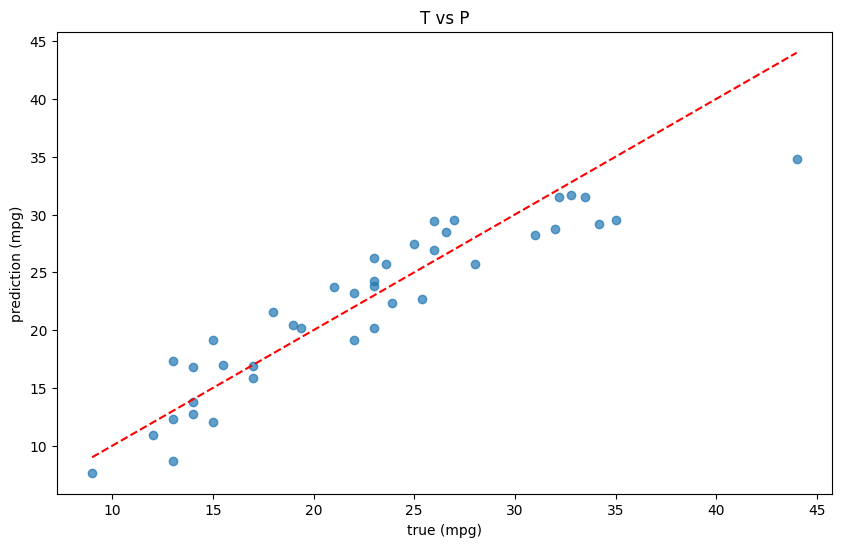

In [13]:
import matplotlib.pyplot as plt

# 検証データの予測結果 vs 実際の値をプロット
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.7)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')  # 完全一致を表すライン
plt.xlabel('true (mpg)')
plt.ylabel('prediction (mpg)')
plt.title('T vs P')
plt.show()


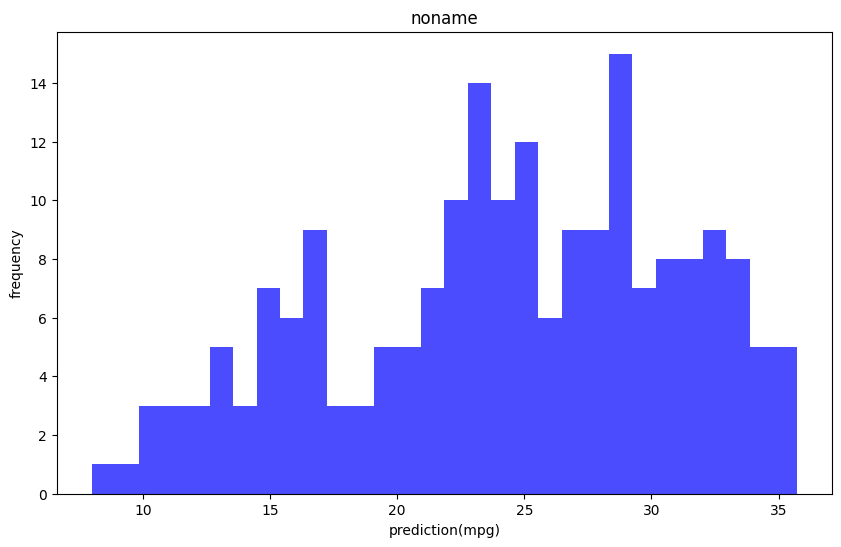

In [17]:
# テストデータの予測結果のヒストグラムをプロット
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=30, alpha=0.7, color='blue')
plt.xlabel('prediction(mpg)')
plt.ylabel('frequency')
plt.title('noname')
plt.show()


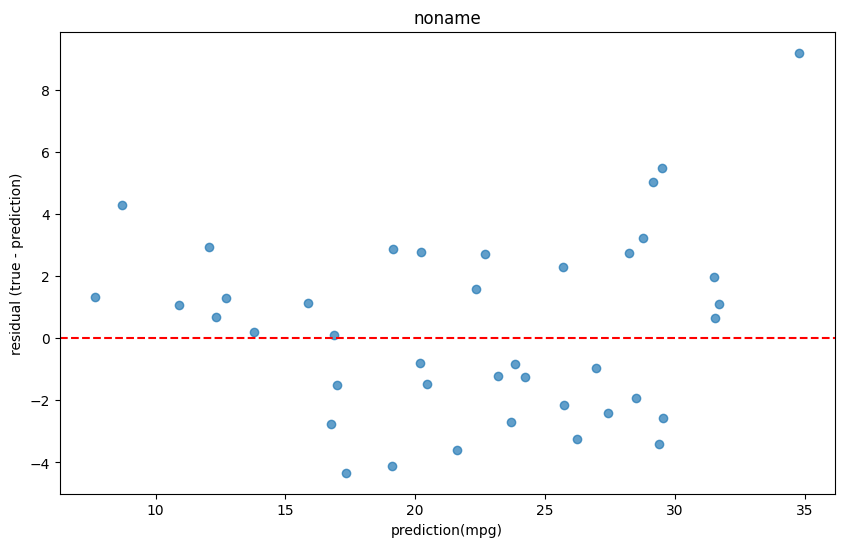

In [18]:
# 残差プロット
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('prediction(mpg)')
plt.ylabel('residual (true - prediction)')
plt.title('noname')
plt.show()
